# 2.1 数据操作

## 入门

In [29]:
import torch

In [30]:
x = torch.arange(12)
x

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [31]:
# 访问张量的形状
x.shape

torch.Size([12])

In [32]:
x.numel()

12

In [33]:
X = x.reshape(3, 4)
X

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])

In [34]:
torch.zeros((2, 3, 4))

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])

In [35]:
torch.ones((2, 3, 4))

tensor([[[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]])

In [36]:
torch.randn(3, 4)

tensor([[-1.0726,  0.4800,  0.0480, -0.6464],
        [-1.2857, -0.9741, -0.7054,  0.6013],
        [ 0.5892, -0.3005, -0.9346,  0.9502]])

In [37]:
torch.tensor([[2, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])

tensor([[2, 1, 4, 3],
        [1, 2, 3, 4],
        [4, 3, 2, 1]])

## 运算符 

In [38]:
x=torch.tensor([1.0,2,4,8])
y=torch.tensor([2,2,2,2])
x+y,x-y,x*y,x/y,x**y

(tensor([ 3.,  4.,  6., 10.]),
 tensor([-1.,  0.,  2.,  6.]),
 tensor([ 2.,  4.,  8., 16.]),
 tensor([0.5000, 1.0000, 2.0000, 4.0000]),
 tensor([ 1.,  4., 16., 64.]))

In [39]:
torch.exp(x)

tensor([2.7183e+00, 7.3891e+00, 5.4598e+01, 2.9810e+03])

In [42]:
x=torch.arange(12,dtype=torch.float32).reshape((3,4))
y=torch.tensor([[2.0,1,4,3],[1,2,3,4],[4,3,2,1]])
torch.cat((x,y),dim=0), torch.cat((x,y), dim=1)

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [ 2.,  1.,  4.,  3.],
         [ 1.,  2.,  3.,  4.],
         [ 4.,  3.,  2.,  1.]]),
 tensor([[ 0.,  1.,  2.,  3.,  2.,  1.,  4.,  3.],
         [ 4.,  5.,  6.,  7.,  1.,  2.,  3.,  4.],
         [ 8.,  9., 10., 11.,  4.,  3.,  2.,  1.]]))

In [43]:
x==y

tensor([[False,  True, False,  True],
        [False, False, False, False],
        [False, False, False, False]])

In [65]:
x<y,x>y

(tensor([True, True, True, True]), tensor([False, False, False, False]))

In [44]:
x.sum()

tensor(66.)

## 广播机制

In [52]:
x=torch.arange(3).reshape((3,1))
y=torch.arange(2).reshape((1,2))
x,y
# 形状不匹配，将其广播为更大的3*2矩阵

(tensor([[0],
         [1],
         [2]]),
 tensor([[0, 1]]))

In [53]:
x+y

tensor([[0, 1],
        [1, 2],
        [2, 3]])

## 索引和切片

In [55]:
x=torch.arange(12).reshape((3,4))
# 选择最后一个元素
x[-1], x[1:3]

(tensor([ 8,  9, 10, 11]),
 tensor([[ 4,  5,  6,  7],
         [ 8,  9, 10, 11]]))

In [56]:
X[1, 2] = 9
X

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  9,  7],
        [ 8,  9, 10, 11]])

In [57]:
X[0:2, :] = 12
X

tensor([[12, 12, 12, 12],
        [12, 12, 12, 12],
        [ 8,  9, 10, 11]])

## 节省内存

In [59]:
x=torch.tensor([1.0,2,4,8])
y=torch.tensor([2,2,2,2])

before = id(y)
y = y + x
id(y) == before

# 会分配新的内存

False

In [61]:
# 使用切片操作节省内存
z=torch.zeros_like(y)
print('id(z):',id(z))
z[:]=x+y
print('id(z):',id(z))

id(z): 2819944956224
id(z): 2819944956224


## 转换为其他python对象

In [62]:
A = x.numpy()
B = torch.tensor(A)
type(A), type(B)

(numpy.ndarray, torch.Tensor)

In [63]:
a = torch.tensor([3.5])
a, a.item(), float(a), int(a)

(tensor([3.5000]), 3.5, 3.5, 3)

# 2.4 微积分

## 导数和微分

In [66]:
%matplotlib inline
import numpy as np
from matplotlib_inline import backend_inline
from d2l import torch as d2l


def f(x):
    return 3 * x ** 2 - 4 * x

In [68]:
def numerical_lim(f,x,h):
    return (f(x+h)-f(x))/h
h=0.1
for i in range(5):
    print(f'h={h:.5f}, numerical limit={numerical_lim(f, 1, h):.5f}')
    h*=0.1

h=0.10000, numerical limit=2.30000
h=0.01000, numerical limit=2.03000
h=0.00100, numerical limit=2.00300
h=0.00010, numerical limit=2.00030
h=0.00001, numerical limit=2.00003


In [79]:
def use_svg_display():  #@save
    """使用svg格式在Jupyter中显示绘图"""
    # backend_inline.set_matplotlib_formats('svg')

In [80]:
def set_figsize(figsize=(3.5, 2.5)):  #@save
    """设置matplotlib的图表大小"""
    use_svg_display()
    d2l.plt.rcParams['figure.figsize'] = figsize

In [81]:
#@save
def set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend):
    """设置matplotlib的轴"""
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    axes.set_xscale(xscale)
    axes.set_yscale(yscale)
    axes.set_xlim(xlim)
    axes.set_ylim(ylim)
    if legend:
        axes.legend(legend)
    axes.grid()

In [82]:
#@save
def plot(X, Y=None, xlabel=None, ylabel=None, legend=None, xlim=None,
         ylim=None, xscale='linear', yscale='linear',
         fmts=('-', 'm--', 'g-.', 'r:'), figsize=(3.5, 2.5), axes=None):
    """绘制数据点"""
    if legend is None:
        legend = []

    set_figsize(figsize)
    axes = axes if axes else d2l.plt.gca()

    # 如果X有一个轴，输出True
    def has_one_axis(X):
        return (hasattr(X, "ndim") and X.ndim == 1 or isinstance(X, list)
                and not hasattr(X[0], "__len__"))

    if has_one_axis(X):
        X = [X]
    if Y is None:
        X, Y = [[]] * len(X), X
    elif has_one_axis(Y):
        Y = [Y]
    if len(X) != len(Y):
        X = X * len(Y)
    axes.cla()
    for x, y, fmt in zip(X, Y, fmts):
        if len(x):
            axes.plot(x, y, fmt)
        else:
            axes.plot(y, fmt)
    set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend)

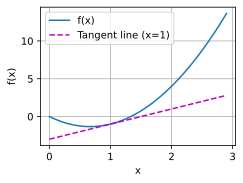

In [83]:
x = np.arange(0, 3, 0.1)
plot(x, [f(x), 2 * x - 3], 'x', 'f(x)', legend=['f(x)', 'Tangent line (x=1)'])

# 2.5 自动微分

## 简单的例子

In [84]:
import torch

x = torch.arange(4.0)
x

tensor([0., 1., 2., 3.])

In [85]:
x.requires_grad_(True)  # 等价于x=torch.arange(4.0,requires_grad=True)
x.grad  # 默认值是None

In [86]:
y = 2 * torch.dot(x, x)
y

tensor(28., grad_fn=<MulBackward0>)

In [87]:
y.backward()
x.grad

tensor([ 0.,  4.,  8., 12.])

In [88]:
x.grad == 4*x

tensor([True, True, True, True])

In [94]:
x.grad.zero_()
y=x.sum()
y.backward()
x.grad
x

tensor([0., 1., 2., 3.], requires_grad=True)

## 非标量变量的反向传播

In [95]:
# 对非标量调用backward需要传入一个gradient参数，该参数指定微分函数关于self的梯度。
# 本例只想求偏导数的和，所以传递一个1的梯度是合适的
x.grad.zero_()
y = x * x
# 等价于y.backward(torch.ones(len(x)))
y.sum().backward()
x.grad

tensor([0., 2., 4., 6.])

## 分离计算

In [105]:
x.grad.zero_()
y = x * x
u = y.detach()
z = u * x

z.sum().backward()
x.grad == u

tensor([True, True, True, True])

## python控制流的梯度计算

In [106]:
def f(a):
    b = a * 2
    while b.norm() < 1000:
        b = b * 2
    if b.sum() > 0:
        c = b
    else:
        c = 100 * b
    return c

In [107]:
a = torch.randn(size=(), requires_grad=True)
d = f(a)
d.backward()

In [108]:
a.grad == d / a

tensor(True)

# 2.6 概率

## 基本概率论

In [27]:
import torch
from torch.distributions import multinomial
from d2l import torch as d2l

In [17]:
fair_probs = torch.ones([6]) / 6
# 单词抽样中样本的个数 各事件发生的频率
multinomial.Multinomial(1, fair_probs).sample()

tensor([0., 0., 1., 0., 0., 0.])

In [16]:
multinomial.Multinomial(10, fair_probs).sample()

tensor([1., 1., 4., 1., 2., 1.])

In [18]:
# 将结果存储为32位浮点数以进行除法
counts = multinomial.Multinomial(1000, fair_probs).sample()
counts / 1000  # 相对频率作为估计值

tensor([0.1610, 0.1700, 0.1830, 0.1540, 0.1550, 0.1770])

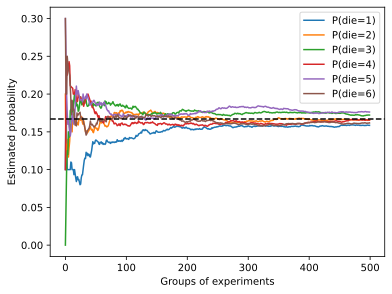

In [28]:
# 取500个样本
counts = multinomial.Multinomial(10, fair_probs).sample((500,))
# 计算轴向的累加和
cum_counts = counts.cumsum(dim=0)
estimates = cum_counts / cum_counts.sum(dim=1, keepdims=True)
d2l.set_figsize((6, 4.5))
for i in range(6):
    d2l.plt.plot(estimates[:, i].numpy(),
                 label=("P(die=" + str(i + 1) + ")"))
d2l.plt.axhline(y=0.167, color='black', linestyle='dashed')
d2l.plt.gca().set_xlabel('Groups of experiments')
d2l.plt.gca().set_ylabel('Estimated probability')
d2l.plt.legend();